# essential gene cnv analysis

Step-by-step process

1. matched_sample의 tumor column에서 마지막 알파벳을 뗀다.
2. cnv_df에서 match_df에 있는 것만 남겨둔다.
3. cnv_df의 gene list에서 predicted list에 있는 것만 뽑아낸다.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# read dataframes
cnv_th_df      = pd.read_table('../Gistic2_CopyNumber_Gistic2_all_thresholded.by_genes', header=0, index_col=0, sep='\t')
cnv_val_df     = pd.read_table('../Gistic2_CopyNumber_Gistic2_all_data_by_genes', header=0, index_col=0, sep='\t')
match_df       = pd.read_table('../matched_samples.txt', header=0, index_col=None, sep='\t')
tumor_pred_df  = pd.read_table('../Tumor_prediction.tsv', sep='\t', header=None, names=['case', 'gene', 'a', 'b'], 
                              index_col=False, usecols=['case', 'gene'])
normal_pred_df = pd.read_table('../Normal_prediction.tsv', sep='\t', header=None, names=['case', 'gene', 'a', 'b'], 
                              index_col=False, usecols=['case', 'gene'])
# drop last alphabet 'A' or 'B' for compatibility with other datasets
match_df.Normal = match_df.Normal.str[:-1]
match_df.Tumor = match_df.Tumor.str[:-1]  
tumor_pred_df.case = tumor_pred_df.case.str[:-1]
normal_pred_df.case = normal_pred_df.case.str[:-1]

print match_df.head()
print cnv_th_df.head()
print cnv_val_df.head()
print tumor_pred_df.head()
print normal_pred_df.head()

            Normal            Tumor
0  TCGA-E2-A15M-11  TCGA-E2-A15M-01
1  TCGA-E2-A15K-11  TCGA-E2-A15K-01
2  TCGA-E2-A15I-11  TCGA-E2-A15I-01
3  TCGA-BH-A0B3-11  TCGA-BH-A0B3-01
4  TCGA-BH-A0H9-11  TCGA-BH-A0H9-01
             TCGA-3C-AAAU-01  TCGA-3C-AALI-01  TCGA-3C-AALJ-01  \
Gene Symbol                                                      
ACAP3                      0               -1               -1   
ACTRT2                     0               -1               -1   
AGRN                       0               -1               -1   
ANKRD65                    0               -1               -1   
ATAD3A                     0               -1               -1   

             TCGA-3C-AALK-01  TCGA-4H-AAAK-01  TCGA-5L-AAT0-01  \
Gene Symbol                                                      
ACAP3                      0                0                0   
ACTRT2                     0                0                0   
AGRN                       0                0            

In [53]:
# 'TCGA-BH-A0B8-01' and 'TCGA-E2-A1LS-01' does not exist in cnv_df
drop_idx = match_df[(match_df.Tumor.str.find('TCGA-BH-A0B8-01') != -1) | (match_df.Tumor.str.find('TCGA-E2-A1LS-01') != -1)].index
match_df.drop(drop_idx, axis=0, inplace=True)
cases = match_df.Tumor
# leave only match cases
case_cnv_th_df = cnv_th_df[cases]
case_cnv_val_df = cnv_val_df[cases]

In [66]:
# construct new dataframe
# case                 gene     normal_ess    tumor_ess    cnv-threshold   cnv_val
# TCGA-BH-A18U-01    COX4I1              1            0               2       1.23

new_df = pd.DataFrame(columns=['case', 'gene', 'normal_ess', 'tumor_ess', 'cnv_threshold', 'cnv_val'])
for idx, row in tumor_pred_df.iterrows():
    #print row
    try:
        new_row = pd.Series({'case' : row.case,
                            'gene' : row.gene,
                            'normal_ess' : 0,
                            'tumor_ess' : 1,
                            'cnv_threshold' : case_cnv_th_df.loc[row.gene, row.case],
                            'cnv_val' : case_cnv_val_df.loc[row.gene, row.case]})
        new_df = new_df.append(new_row, ignore_index=True)
    except KeyError:
        pass
        #print "{0} does not exist".format(row)


for idx, row in normal_pred_df.iterrows():
    #print row
    try:
        new_row = pd.Series({'case' : row.case[:-2] + '01',
                            'gene' : row.gene,
                            'normal_ess' : 1,
                            'tumor_ess' : 0,
                            'cnv_threshold' : case_cnv_th_df.loc[row.gene, row.case[:-2] + '01'],
                            'cnv_val' : case_cnv_val_df.loc[row.gene, row.case[:-2] + '01']})
        new_df = new_df.append(new_row, ignore_index=True)
    except KeyError:
        pass
        #print "{0} does not exist".format(row)



case    TCGA-E2-A1LS-01
gene             COX4I1
Name: 116, dtype: object does not exist
case    TCGA-E2-A1LS-01
gene              PSMB4
Name: 117, dtype: object does not exist
case    TCGA-E2-A1LS-01
gene               NACA
Name: 118, dtype: object does not exist
case    TCGA-E2-A1LS-01
gene             TUBA1B
Name: 119, dtype: object does not exist
case    TCGA-E2-A1LS-01
gene             NDUFA1
Name: 120, dtype: object does not exist
case    TCGA-E2-A1LS-01
gene                RAN
Name: 121, dtype: object does not exist
case    TCGA-E2-A1LS-01
gene              UQCRH
Name: 122, dtype: object does not exist
case    TCGA-E2-A1LS-01
gene              SHFM1
Name: 123, dtype: object does not exist
case    TCGA-BH-A0B8-01
gene               NACA
Name: 466, dtype: object does not exist
case    TCGA-BH-A0B8-01
gene             TUBA1B
Name: 467, dtype: object does not exist
case    TCGA-BH-A0B8-11
gene             COX4I1
Name: 35, dtype: object does not exist
case    TCGA-BH-A0B8-11
gene     

,case,gene,normal_ess,tumor_ess,cnv_threshold,cnv_val
0,TCGA-BH-A18U-01,COX4I1,0,1,-1,-0.593
1,TCGA-BH-A18U-01,PSMB4,0,1,1,0.685
2,TCGA-BH-A18U-01,TUBA1B,0,1,0,-0.040
3,TCGA-BH-A18U-01,NACA,0,1,0,-0.040
4,TCGA-BH-A18U-01,RAN,0,1,0,-0.040
5,TCGA-BH-A18U-01,UQCRH,0,1,-1,-0.337
6,TCGA-BH-A18U-01,SHFM1,0,1,0,0.027
7,TCGA-BH-A18U-01,ATP5G2,0,1,0,-0.040
8,TCGA-E9-A1N4-01,COX4I1,0,1,-1,-0.680
9,TCGA-E9-A1N4-01,TUBA1B,0,1,0,-0.007


In [70]:
new_df.loc[new_df[new_df.duplicated(subset=['case', 'gene'], keep=False)].index, 'normal_ess'] = 1
new_df.loc[new_df[new_df.duplicated(subset=['case', 'gene'], keep=False)].index, 'tumor_ess'] = 1
new_df.drop_duplicates(inplace=True)
new_df

,case,gene,normal_ess,tumor_ess,cnv_threshold,cnv_val
0,TCGA-BH-A18U-01,COX4I1,1,1,-1,-0.593
1,TCGA-BH-A18U-01,PSMB4,0,1,1,0.685
2,TCGA-BH-A18U-01,TUBA1B,1,1,0,-0.040
3,TCGA-BH-A18U-01,NACA,1,1,0,-0.040
4,TCGA-BH-A18U-01,RAN,0,1,0,-0.040
5,TCGA-BH-A18U-01,UQCRH,1,1,-1,-0.337
6,TCGA-BH-A18U-01,SHFM1,1,1,0,0.027
7,TCGA-BH-A18U-01,ATP5G2,0,1,0,-0.040
8,TCGA-E9-A1N4-01,COX4I1,1,1,-1,-0.680
9,TCGA-E9-A1N4-01,TUBA1B,1,1,0,-0.007


In [79]:
new_df.to_csv('../essential_gene_cnv_gistic.tsv', sep='\t')

In [81]:
np.unique(new_df.gene.values).shape

(133,)

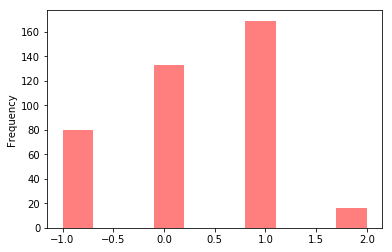

In [109]:
plt.figure()
new_df[(new_df['normal_ess'] == 0) & (new_df['tumor_ess'] == 1)].cnv_threshold.plot.hist(alpha=0.5, color='r')
#new_df[(new_df['normal_ess'] == 1) & (new_df['tumor_ess'] == 0)].cnv_threshold.plot.hist(alpha=0.5, color='y')
#new_df[(new_df['normal_ess'] == 1) & (new_df['tumor_ess'] == 1)].cnv_threshold.plot.hist(alpha=0.5, color='g')
plt.show()

In [177]:
cyclops = pd.read_table('../CYCLOPS_project_drive.txt', header=None, names=['gene'], index_col=False)
cyclops = cyclops.gene.values
cancer_role = pd.read_table('../Cancer_Role.tsv', header=None, names=['gene', 'role'], index_col=False)

In [178]:
cyclops_in_frame = []
for gene in np.unique(new_df.gene.values):
    if gene in cyclops:
        cyclops_in_frame.append(gene)
print cyclops_in_frame

['CCT2', 'COPA', 'NUTF2', 'PSMA6', 'PSMC2', 'PSMC4', 'PSMD2', 'RAN', 'SHFM1', 'XRCC6']


In [179]:
oncogenes = cancer_role[cancer_role.role == 'oncogene'].gene.values
tsg = cancer_role[cancer_role.role == 'TSG'].gene.values
both = cancer_role[cancer_role.role == 'oncogene/TSG'].gene.values

new_df['role'] = np.nan
for idx, row in new_df.iterrows():
    if row.gene in cyclops:
        new_df.loc[idx, 'role'] = 'CYCLOPS'
    elif row.gene in oncogenes:
        new_df.loc[idx, 'role'] = 'oncogene'
    elif row.gene in tsg:
        new_df.loc[idx, 'role'] = 'TSG'
    elif row.gene in both:
        new_df.loc[idx, 'role'] = 'oncogene/TSG'
new_df

,case,gene,normal_ess,tumor_ess,cnv_threshold,cnv_val,role
0,TCGA-BH-A18U-01,COX4I1,1,1,-1,-0.593,NaN
1,TCGA-BH-A18U-01,PSMB4,0,1,1,0.685,NaN
2,TCGA-BH-A18U-01,TUBA1B,1,1,0,-0.040,NaN
3,TCGA-BH-A18U-01,NACA,1,1,0,-0.040,NaN
4,TCGA-BH-A18U-01,RAN,0,1,0,-0.040,CYCLOPS
5,TCGA-BH-A18U-01,UQCRH,1,1,-1,-0.337,NaN
6,TCGA-BH-A18U-01,SHFM1,1,1,0,0.027,CYCLOPS
7,TCGA-BH-A18U-01,ATP5G2,0,1,0,-0.040,NaN
8,TCGA-E9-A1N4-01,COX4I1,1,1,-1,-0.680,NaN
9,TCGA-E9-A1N4-01,TUBA1B,1,1,0,-0.007,NaN


In [136]:
new_df.to_csv('../essential_gene_cnv_gistic.tsv', sep='\t')

In [142]:
print oncogenes
print tsg
print both

['CSF3R' 'CCND3' 'CCND2' 'AKAP9' 'SETBP1' 'JAK3' 'JAK1' 'MTOR' 'HOXC13'
 'HLF' 'DNMT1' 'SMO' 'REL' 'COL2A1' 'NCOA3' 'MAP2K2' 'LMO1' 'EGFR' 'CXCR4'
 'CALR' 'IKBKB' 'RARA' 'NFE2L2' 'BRD3' 'SYK' 'FOXP1' 'FUS' 'U2AF1' 'CCNE1'
 'CD74' 'SKP2' 'MECOM' 'CSF1R' 'FOXL2' 'NUTM1' 'CDK4' 'CDK6' 'HOXA9' 'USP8'
 'MED12' 'XPO1' 'RAC1' 'HIST1H3B' 'ACKR3' 'CANT1' 'CACNA1D' 'ERBB3' 'H3F3A'
 'TRIM24' 'CREB1' 'BRD4' 'FGFR2' 'FGFR3' 'ATIC' 'HIF1A' 'CRTC1' 'TSHR'
 'SRSF2' 'AFF4' 'AFF3' 'AFF1' 'ROS1' 'TRRAP' 'HOXC11' 'ASPSCR1' 'GNAQ'
 'GNAS' 'DDR2' 'CD79B' 'BCR' 'CD79A' 'STAT3' 'HOXA13' 'HOXA11' 'BCL7A'
 'SF3B1' 'WAS' 'COL1A1' 'PPP2R1A' 'NAB2' 'RUNX1T1' 'MLLT1' 'MLLT3' 'PLAG1'
 'KMT2A' 'SPOP' 'BCL9' 'BCL5' 'BCL6' 'BCL3' 'AKT2' 'NKX2-1' 'DDX5' 'CHD4'
 'HOXD13' 'HOXD11' 'ABL2' 'MAPK1' 'NFKB2' 'HMGA2' 'WWTR1' 'PRKACA' 'MYCL1'
 'ACVR1' 'BCL11A' 'PDGFB' 'EZR' 'CREB3L2' 'GNA11' 'C2orf44']
['BUB1B' 'CBLB' 'ARHGEF12' 'CTCF' 'ACVR1B' 'CDKN1B' 'MLL3' 'MLL2' 'NF1'
 'FAM123B' 'BLM' 'PRDM1' 'SMAD3' 'CIITA' 'RBM10' 'HNF1A'

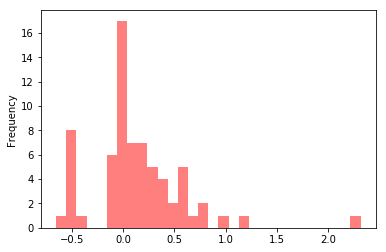

In [181]:
plt.figure()
new_df[(new_df['role'] == 'CYCLOPS') & (new_df['tumor_ess'] == 1)  & (new_df['normal_ess'] == 0)].cnv_val.plot.hist(alpha=0.5, color='r', bins=30)
plt.show()

In [194]:
for gene in np.unique(new_df[(new_df['cnv_threshold'] > 0) & (new_df['normal_ess'] == 0) & (new_df['tumor_ess'] == 1)]['gene'].values):
    print gene

AHCY
AHSA1
ARCN1
ATP5G2
ATP5J2
CCT2
CD63
COPA
COPE
COX4I1
COX6B1
COX7C
CREB3L4
DUS1L
DYNLRB1
EIF3E
ENY2
FASN
FKBP3
FOXA1
FTL
GATA3
GMPS
GPS1
GTPBP4
HAX1
HGS
HSPD1
KPNA2
KRT18
MLF2
MUC1
MYL6
NDUFA12
NDUFA13
NDUFA3
NDUFB4
NDUFB9
NEDD8
NHP2L1
NUMA1
PDIA4
PFDN2
PFDN5
PPIA
PPP1R14B
PSENEN
PSMA6
PSMA7
PSMB3
PSMB4
PSMC2
PSMD2
PSMD4
PSMD8
PTGES3
RAN
RHEB
S100A10
SHFM1
SPDEF
SSR2
STARD10
TCP1
TFF3
TIMM50
TMED2
TPI1
TUBA1C
UBE2C
UBE2N
UQCRH
VPS29
XRCC6
YKT6
YWHAZ


In [171]:

new_df[(new_df['role'] == 'CYCLOPS')]


,case,gene,normal_ess,tumor_ess,cnv_threshold,cnv_val,role
52,TCGA-A7-A13E-01,TIMM50,0,1,2,3.657,CYCLOPS
177,TCGA-BH-A0BT-01,GPS1,0,1,1,0.260,CYCLOPS
183,TCGA-BH-A0BT-01,PSMC2,0,1,1,0.307,CYCLOPS
186,TCGA-BH-A0BT-01,NUTF2,0,1,-1,-0.504,CYCLOPS
497,TCGA-E2-A1LH-01,PSMC2,0,1,1,0.116,CYCLOPS
1340,TCGA-E2-A15K-01,GPS1,1,0,0,-0.035,CYCLOPS
1343,TCGA-E2-A15K-01,PSMC2,1,0,0,-0.002,CYCLOPS
1426,TCGA-E2-A1BC-01,PSMC4,1,0,0,-0.022,CYCLOPS
1629,TCGA-BH-A18V-01,PSMC2,1,0,1,0.380,CYCLOPS


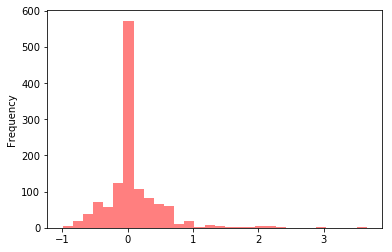

In [176]:
plt.figure()
new_df.cnv_val.plot.hist(alpha=0.5, color='r', bins=30)
plt.show()